In [16]:
import pandas as pd

In [17]:
# path to folder containing raw GTFS static data
# from https://www.translink.ca/about-us/doing-business-with-translink/app-developer-resources/gtfs/gtfs-data
PATH = 'raw_data/'

## 1. Remove unused data from files
Files currently contain data for irrelevant transport methods (skytrain, handydart, etc). 

For this project, we only care about bus stops. 

### Cleaning stops.txt

In [18]:
# Cleaning stops.txt to contain only bus stops
stops = pd.read_csv(PATH + 'stops.txt')
print("Size of stops:", stops.shape[0])
stops = stops[stops['zone_id'] == 'BUS ZN']
stops['stop_code'] = stops['stop_code'].astype(int)
print("Size of cleaned stops:", stops.shape[0])

Size of stops: 8789
Size of cleaned stops: 8594


In [19]:
# Select only relevant columns
stops = stops[['stop_id','stop_code','stop_name','stop_lat','stop_lon']]
stops

stop_id  stop_code                                  stop_name  \
0           1      50001            Westbound Davie St @ Bidwell St   
1       10000      59326           Northbound No. 5 Rd @ McNeely Dr   
2       10001      59324          Northbound No. 5 Rd @ Woodhead Rd   
3       10002      59323            Southbound No. 5 Rd @ Cambie Rd   
4       10003      59325          Southbound No. 5 Rd @ Woodhead Rd   
...       ...        ...                                        ...   
8726     9995      57894           Eastbound River Rd @ 23900 Block   
8727     9996      59334        Westbound Jack Bell Dr @ Jacombs Rd   
8728     9997      59333  Southbound Jack Bell Dr @ Wyne Cres North   
8729     9998      59330       Westbound Jack Bell Dr @ 12500 Block   
8730     9999      59328        Westbound Jack Bell Dr @ McNeely Dr   

       stop_lat    stop_lon  
0     49.286458 -123.140424  
1     49.179962 -123.091490  
2     49.182670 -123.091448  
3     49.184252 -123.091627  
4     49.182051 -123.091659  
...         ...         ...  
8726  49.182805 -122.560041  
8727  49.182422 -123.080727  
8728  49.180316 -123.082262  
8729  49.178319 -123.084824  
8730  49.179561 -123.087002  

[8594 rows x 5 columns]

### Cleaning routes.txt

In [20]:
routes = pd.read_csv(PATH + 'routes.txt')
print("Size of routes:", routes.shape[0])
routes = routes[routes['route_type'] == 3]
print("Size of cleaned routes:", routes.shape[0])

Size of routes: 238
Size of cleaned routes: 232


In [21]:
routes = routes[['route_id','route_short_name','route_long_name']]
routes

route_id route_short_name                       route_long_name
0      10232              256     Whitby Estate/Park Royal/Spuraway
1      11201              033               29th Avenue Station/UBC
2      11692              364             Langley Centre/Scottsdale
3      11693              388     22nd St Station/Carvolth Exchange
4      11696              609  South Delta Exchange/Ladner Exchange
..       ...              ...                                   ...
232     7322              132       Capitol Hill/Hastings @ Gilmore
233     8286              370                Cloverdale/Willowbrook
234     8289              865                      Samuel Robertson
235     8290              341             Guildford/Newton Exchange
236     9745              418             Kingswood/22nd St Station

[232 rows x 3 columns]

### Cleaning trips.txt and stop_times.txt

Both require checks against a set of unique identifiers to relate records to bus routes and stops.

In [22]:
# Unique id for a bus route (ie: 145 Production Way/SFU, 16 Arbutus, etc)
route_ids = set(routes['route_id'])

# Unique id for a bus stop
stop_ids = set(stops['stop_id'])

In [23]:
# Each record of trips.txt is associated with a bus route
# A trip_id uniquely identifies a single service run of a bus from start to end. 
trips = pd.read_csv(PATH + 'trips.txt')
print("Size of trips:", trips.shape[0])
trips = trips[trips['route_id'].isin(route_ids)]
print("Size of cleaned trips:", trips.shape[0])

Size of trips: 60997
Size of cleaned trips: 55189


In [24]:
trips = trips[['trip_id','route_id','trip_headsign']]
trips

trip_id route_id                        trip_headsign
0      13997545     6612       2 Macdonald/To Burrard Station
1      13997546     6612       2 Macdonald/To Burrard Station
2      13997547     6612       2 Macdonald/To Burrard Station
3      13997548     6612       2 Macdonald/To Burrard Station
4      13997549     6612       2 Macdonald/To Burrard Station
...         ...      ...                                  ...
60991  14321213    34544                        282 Snug Cove
60992  14321214    31822                   741 Anderson Creek
60993  14321215    31822                      741 Haney Place
60994  14321448     6651  130 Willingdon/To Metrotown Station
60995  14321449     6646                 110 Lougheed Station

[55189 rows x 3 columns]

In [25]:
# Each record of stop_times.txt identifies an instance of a bus arriving at a stop
# A stop_time is apart of a trip, and is associated with multiple stops
stop_times = pd.read_csv(PATH + 'stop_times.txt')
print("Size of stop_times:", stop_times.shape[0])
stop_times = stop_times[stop_times['stop_id'].isin(stop_ids)]
print("Size of cleaned stop_times:", stop_times.shape[0])

Size of stop_times: 1779653
Size of cleaned stop_times: 1690279


In [26]:
stop_times = stop_times[['trip_id','stop_id','arrival_time']]
stop_times

trip_id  stop_id arrival_time
0        13997545      646      5:11:00
1        13997545     1277      5:18:53
2        13997545     1279      5:19:48
3        13997545       56      5:21:05
4        13997545    12619      5:21:39
...           ...      ...          ...
1779648  14321449     2527     15:33:06
1779649  14321449     2528     15:34:06
1779650  14321449     2529     15:34:42
1779651  14321449     2530     15:35:13
1779652  14321449     2531     15:35:56

[1690279 rows x 3 columns]

### 1.1 Export Cleaned Data
Write transformed data files to respective output files 

In [27]:
stops.to_csv('stops.txt', index=False)
routes.to_csv('routes.txt', index=False)
trips.to_csv('trips.txt', index=False)
stop_times.to_csv('stop_times.txt', index=False)

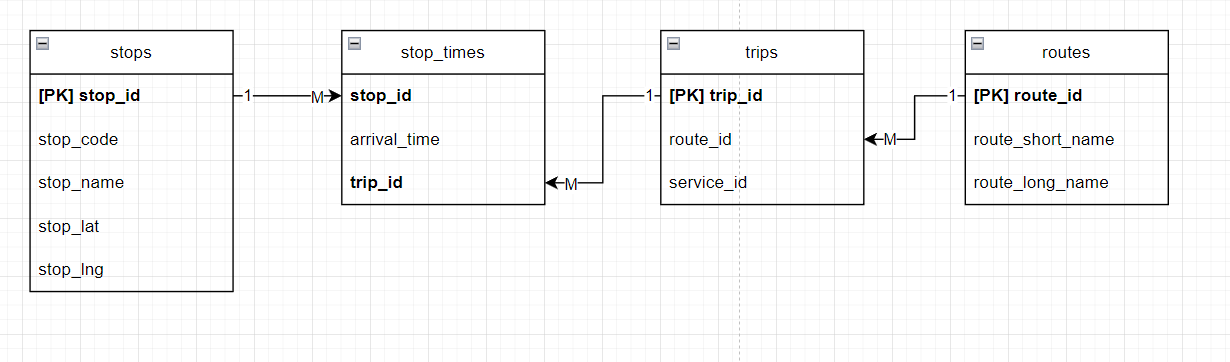

In [28]:
# Cleanup memory
del stop_times
del stops
del routes
del trips

del route_ids
del stop_ids

## 2. Joining file contents


BusStops object structure

```json
{
  "id": 9952,
  "code": 59316,
  "name": "Production Station @ Bay 3",
  "location": {
    "lat": 49.254032,
    "lon": -122.918229
  },
  "nextBusses": [
    {
      "routeId": 6646,
      "tripId": 14015208,
      "arrivalTime": "20:21:00"
    },
    {
      "routeId": 6654,
      "tripId": 14018619,
      "arrivalTime": "21:00:00"
    }
    // ...
  ],
  "routes": [
    {
      "id": 6654, // Route id
      "shortName": "136",
      "longName": "Lougheed Station/Brentwood Station",
      "trip_headsign": "136 Brentwood Station", // required to show user direction of travel
      "tripIds": [
        14018605, 14018606
        // ...
      ]
    },
    {
      "id": 6646,
      "shortName": "110",
      "longName": "Lougheed Station/Metrotown Station",
      "trip_headsign": "110 Lougheed Station",
      "tripIds": [
        14015208, 14015209
        // ...
      ]
    }
  ]
}
```